# Question 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from sklearn.model_selection import train_test_split
from sktime.forecasting.arima import AutoARIMA

In [2]:
data = pd.read_csv('parkingLot.csv')
data

,vehicle_no,timestamp,camera_id
0,MHUN7063,2024-09-12 05:00:00,1
1,MHYN4677,2024-09-12 05:00:00,1
2,MHEL6595,2024-09-12 05:00:00,1
3,MHNQ2590,2024-09-12 05:00:00,1
4,MHHA0518,2024-09-12 05:00:00,1
...,...,...,...
106689,MHCN7114,2024-11-14 00:00:00,2
106690,MHVY8418,2024-11-14 00:00:00,2
106691,MHSR8102,2024-11-14 00:00:00,2
106692,MHQG5264,2024-11-14 00:00:00,2


In [3]:
# data['vehicle_no'].fillna('Unknown', inplace=True)
data['time'] = pd.to_datetime(data['timestamp'])
# data['date'] = pd.to_datetime(data['timestamp'])
data['date'] = data['time'].dt.date
# if time stamp time is 00 00 then make it's date as previous date
data.loc[data['time'].dt.time == datetime.time(0, 0), 'date'] = data['date'] - pd.Timedelta(days=1)
data

,vehicle_no,timestamp,camera_id,time,date
0,MHUN7063,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12
1,MHYN4677,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12
2,MHEL6595,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12
3,MHNQ2590,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12
4,MHHA0518,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12
...,...,...,...,...,...
106689,MHCN7114,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13
106690,MHVY8418,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13
106691,MHSR8102,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13
106692,MHQG5264,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13


In [4]:
data['camera_1'] = data['camera_id'] == 1
data['camera_2'] = data['camera_id'] == 2
data['camera_1'] = 1 * data['camera_1']
data['camera_2'] = 1 * data['camera_2']

In [5]:
data

,vehicle_no,timestamp,camera_id,time,date,camera_1,camera_2
0,MHUN7063,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
1,MHYN4677,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
2,MHEL6595,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
3,MHNQ2590,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
4,MHHA0518,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
...,...,...,...,...,...,...,...
106689,MHCN7114,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106690,MHVY8418,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106691,MHSR8102,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106692,MHQG5264,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1


In [6]:
data.groupby('timestamp').sum(numeric_only=True)
daily_data = data.groupby('date').sum(numeric_only=True)

In [7]:
vehicle_data = data['vehicle_no']

In [8]:
vehicle_data.aggregate('count')

106253

In [9]:
counts = vehicle_data.value_counts()

In [10]:
counts[counts % 2 == 1]

vehicle_no
MHWW1113    3
MHPY2628    3
MHBK0188    3
MHKA6372    3
MHYV2746    3
           ..
MHYR8351    1
MHJQ7161    1
MHOG5853    1
MHCS4375    1
MHDG83S5    1
Name: count, Length: 1471, dtype: int64

In [11]:
sorted = data.sort_values(by='time')

In [12]:
sorted

,vehicle_no,timestamp,camera_id,time,date,camera_1,camera_2
0,MHUN7063,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
21,MHMY1867,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
20,MHZF8417,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
19,MHFU6425,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
18,MHHB4038,2024-09-12 05:00:00,1,2024-09-12 05:00:00,2024-09-12,1,0
...,...,...,...,...,...,...,...
106675,MHEV1001,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106674,MHGL7893,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106692,MHQG5264,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1
106682,MHBB9719,2024-11-14 00:00:00,2,2024-11-14 00:00:00,2024-11-13,0,1


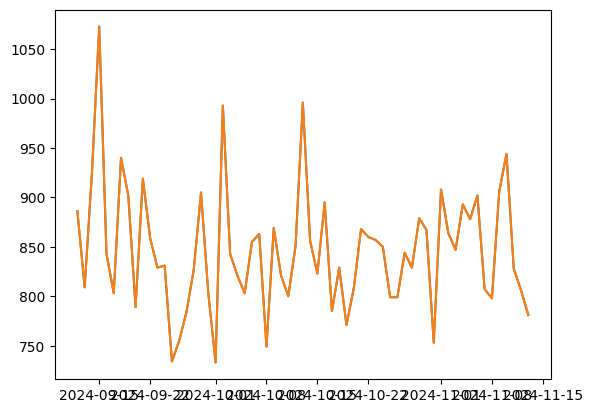

In [13]:
plt.plot(daily_data.index, daily_data['camera_1'], label='Camera 1')
plt.plot(daily_data.index, daily_data['camera_2'], label='Camera 2')

In [14]:
# train an ARIMA model to predict the number of vehicles in the parking lot
# Plot PACF and ACF to determine the order of the ARIMA model
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def tsplot(y, lags=None, figsize=(12, 7)):
    """
        Plot time series, its ACF and PACF, calculate Dickey-Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
           
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()

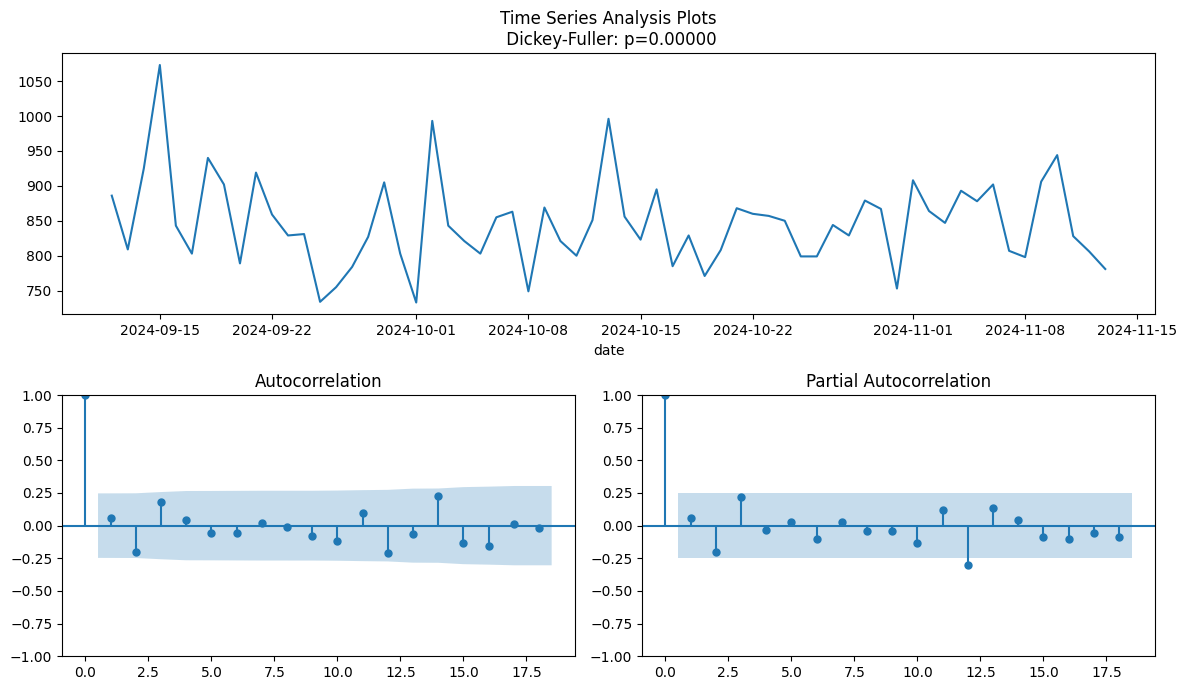

In [15]:
tsplot(daily_data['camera_1'])

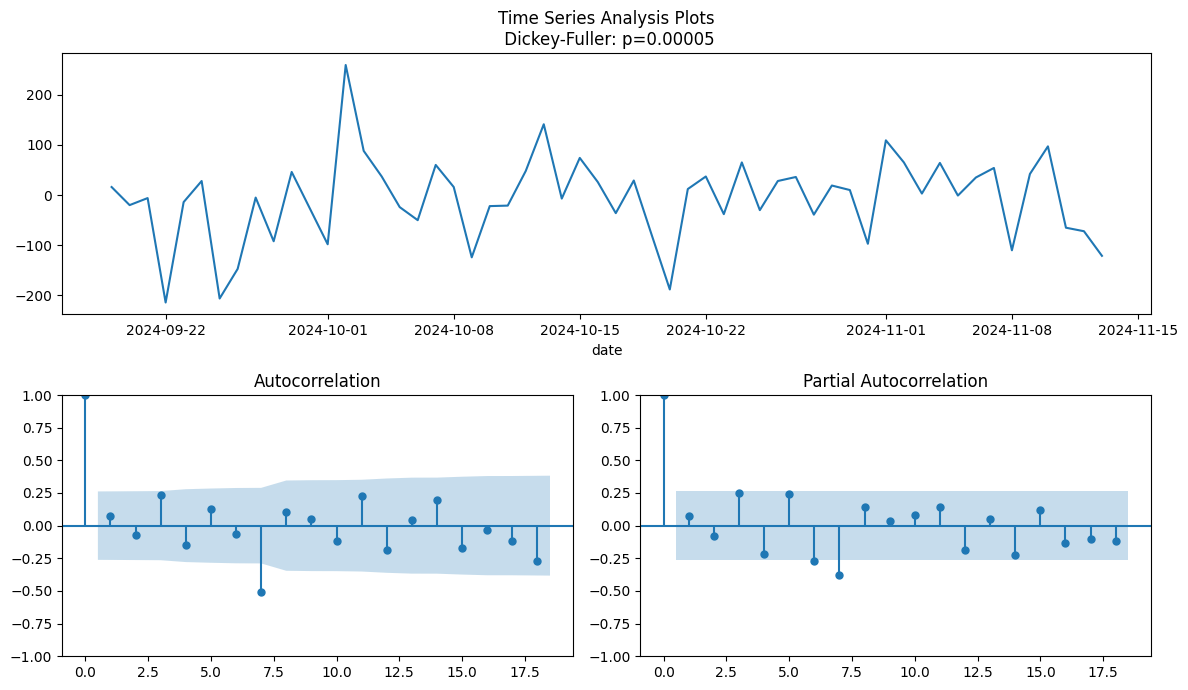

In [16]:
daily_data_diff = daily_data['camera_1'].diff(periods=7).dropna()
tsplot(daily_data_diff)

In [17]:
daily_data_with_numbers = daily_data.reset_index()
daily_data_with_numbers.drop(['date', 'camera_2'], axis=1, inplace=True)

In [18]:
forecaster = AutoARIMA(start_p=1, max_p=3)
forecaster.fit(daily_data_with_numbers)
# forecaster.summary()

ModuleNotFoundError: AutoARIMA requires package 'pmdarima' to be present in the python environment, but 'pmdarima' was not found. 'pmdarima' is a soft dependency and not included in the base sktime installation. Please run: `pip install pmdarima` to install the pmdarima package. To install all soft dependencies, run: `pip install sktime[all_extras]`

In [23]:
daily_data

,camera_id,camera_1,camera_2
date,,,
2024-09-12,2658,886,886
2024-09-13,2427,809,809
2024-09-14,2775,925,925
2024-09-15,3219,1073,1073
2024-09-16,2529,843,843
...,...,...,...
2024-11-09,2718,906,906
2024-11-10,2832,944,944
2024-11-11,2484,828,828


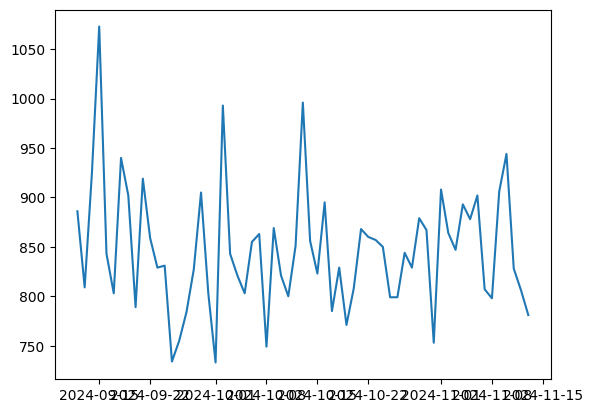

In [24]:
plt.plot(daily_data.index, daily_data['camera_1'], label='Camera 1')
plt.show()

In [44]:
train_size = 56  # 80% for training, 20% for testing
train, test = daily_data[:train_size], daily_data[train_size:]

In [45]:
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 7
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train['camera_1'], order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_results = sarima_model.fit()
print(sarima_results.summary())


c:\Users\mouli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mouli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                          camera_1   No. Observations:                   56
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -270.858
Date:                           Fri, 25 Oct 2024   AIC                            551.716
Time:                                   18:36:38   BIC                            561.072
Sample:                               09-12-2024   HQIC                           555.252
                                    - 11-06-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0067      0.278     -0.024      0.981      -0.552       0.539
ma.L1         -0.7936      0.154     -5.162

In [46]:
forecast_steps = 7
forecast = sarima_results.get_forecast(steps=forecast_steps)

# Extract forecast mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Prepare forecast dates
forecast_dates = pd.date_range(test.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
forecast_df = pd.DataFrame({'timestamp': forecast_dates, 'forecast': forecast_mean})

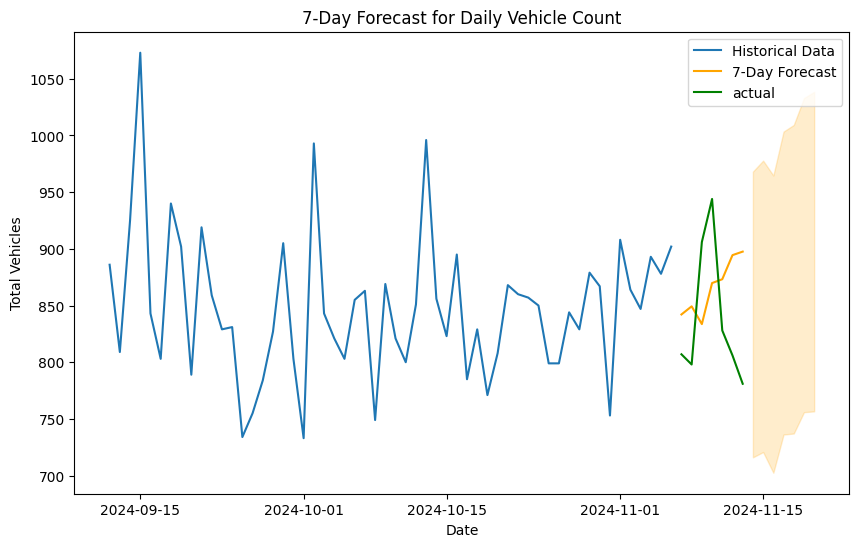

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['camera_1'], label='Historical Data')
plt.plot(test.index, forecast_df['forecast'], label='7-Day Forecast', color='orange')
plt.plot(test.index, test['camera_1'], label='actual', color='green')

plt.fill_between(forecast_df['timestamp'], forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Total Vehicles')
plt.title('7-Day Forecast for Daily Vehicle Count')
plt.legend()
plt.show()

In [48]:
print(forecast_df)
print(test)

            timestamp    forecast
2024-11-07 2024-11-14  842.130074
2024-11-08 2024-11-15  849.299578
2024-11-09 2024-11-16  833.628192
2024-11-10 2024-11-17  869.829178
2024-11-11 2024-11-18  873.210579
2024-11-12 2024-11-19  894.455605
2024-11-13 2024-11-20  897.574668
            camera_id  camera_1  camera_2
date                                     
2024-11-07       2421       807       807
2024-11-08       2394       798       798
2024-11-09       2718       906       906
2024-11-10       2832       944       944
2024-11-11       2484       828       828
2024-11-12       2418       806       806
2024-11-13       2343       781       781


In [92]:
from pmdarima import auto_arima
auto_model = auto_arima(train['camera_1'],
                        # start_p=0, max_p=14,    # Range of values for p
                        # start_q=0, max_q=14,    # Range of values for q
                        p = None,               # Let auto_arima determine the best p
                        q = None,               # Let auto_arima determine the best q
                        d = 0,                # Let auto_arima determine the best d
                        seasonal=True,         # Enable seasonal differencing
                        m=7,                   # Weekly seasonality
                        # start_P=0, max_P=14,    # Range of values for seasonal P
                        # start_Q=0, max_Q=14,    # Range of values for seasonal Q
                        P=None,                # Let auto_arima determine the best P
                        Q=None,                # Let auto_arima determine the best Q

                        D=None,                # Let auto_arima determine the best D
                        trace=True,            # Print results for each model tested
                        # error_action='ignore', # Ignore models that don’t fit
                        suppress_warnings=True,
                        stepwise=True)         # Stepwise search for faster execution

# Display the best model found
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=631.965, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=628.083, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=631.929, Time=0.48 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=631.835, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=916.412, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=630.083, Time=0.16 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=638.936, Time=0.14 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=632.015, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=629.978, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=629.922, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=631.996, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7] intercept
Total fit time: 1.659 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   56
Model: 

In [53]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train['camera_1'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -6.945367069760149
p-value: 1.0004233434079317e-09


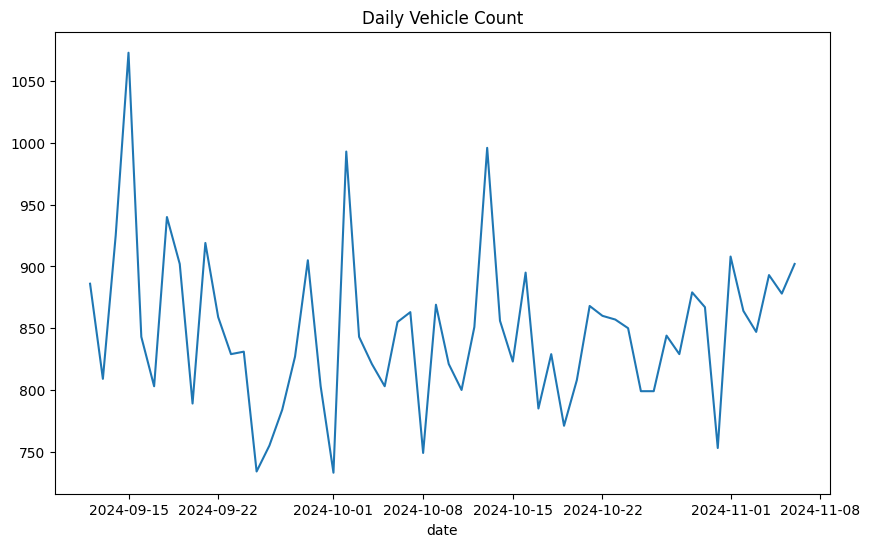

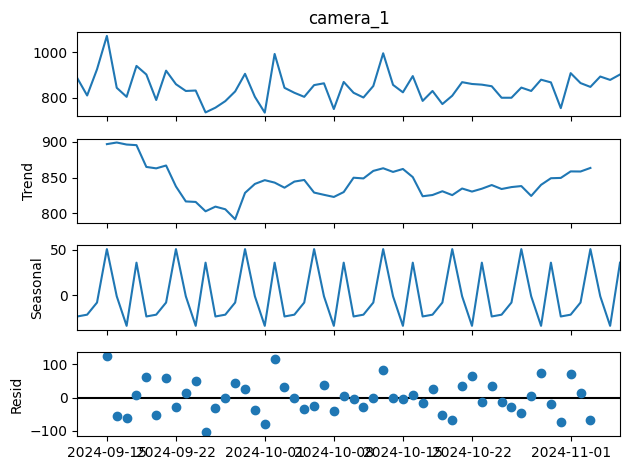

In [58]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot original data
train['camera_1'].plot(title="Daily Vehicle Count", figsize=(10,6))
plt.show()

# Seasonal decomposition
decomposition = seasonal_decompose(train['camera_1'], period=7)
decomposition.plot()
plt.show()

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 camera_1   No. Observations:                   56
Model:             ExponentialSmoothing   SSE                         203102.437
Optimized:                         True   AIC                            480.982
Trend:                         Additive   BIC                            503.261
Seasonal:                      Additive   AICC                           489.649
Seasonal Periods:                     7   Date:                 Fri, 25 Oct 2024
Box-Cox:                          False   Time:                         19:51:33
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0849354                alpha                 True
smoothing_trend          

c:\Users\mouli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


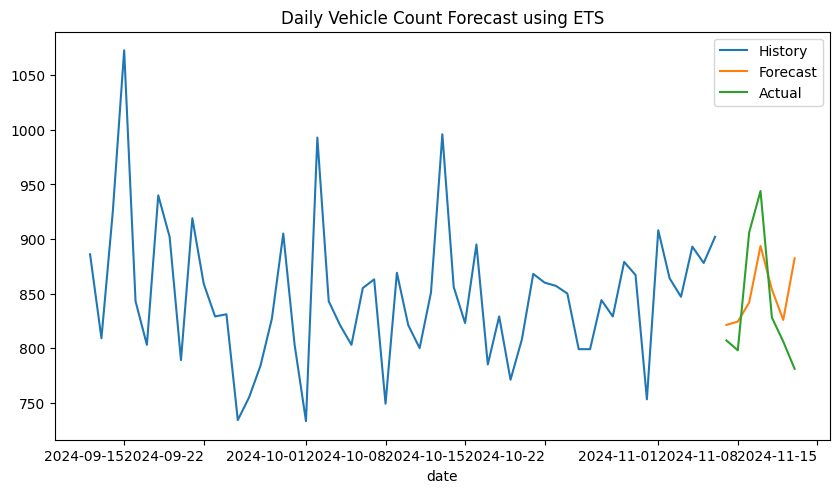

In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming df_daily is your DataFrame containing the daily vehicle counts
# Fit the ETS model (additive trend and seasonality)
ets_model = ExponentialSmoothing(train['camera_1'], 
                                 trend='add', 
                                 seasonal='add', 
                                 seasonal_periods=7).fit()

# Print summary of the ETS model
print(ets_model.summary())

# Forecast for the next 7 days
forecast = ets_model.forecast(7)
print(forecast)

# Plotting the forecast against the actual data
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
train['camera_1'].plot(label='History', legend=True)
forecast.plot(label='Forecast', legend=True)
test['camera_1'].plot(label='Actual', legend=True)
plt.title('Daily Vehicle Count Forecast using ETS')
plt.show()

date
2024-11-07    -14.253719
2024-11-08    -26.257625
2024-11-09     64.222103
2024-11-10     50.406682
2024-11-11    -25.704968
2024-11-12    -19.795615
2024-11-13   -101.305055
dtype: float64


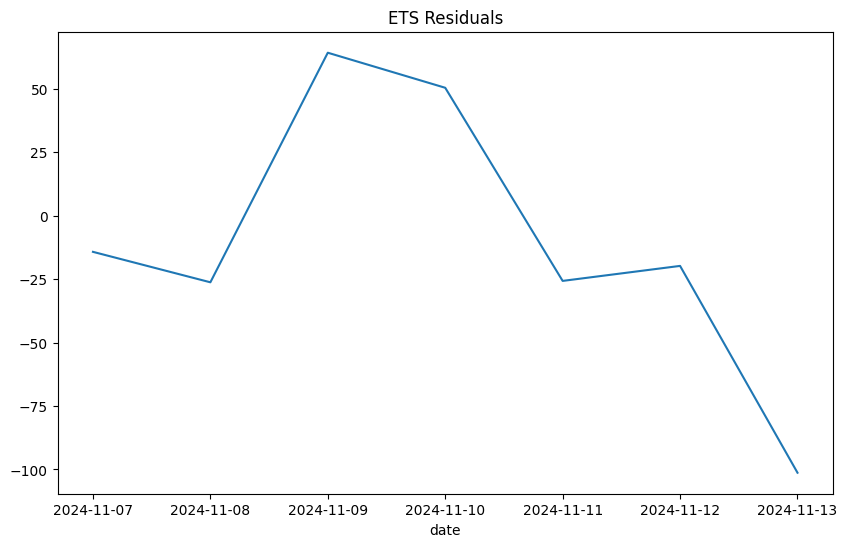

In [106]:
ets_residuals = test['camera_1'] - forecast
# print(train['camera_1'])
# print(forecast)
print(ets_residuals)
plt.figure(figsize=(10,6))
ets_residuals.plot(title='ETS Residuals')
plt.show()


In [108]:
auto_model_ets_residuals = auto_arima(ets_residuals,
                        # start_p=0, max_p=14,    # Range of values for p
                        # start_q=0, max_q=14,    # Range of values for q
                        p = None,               # Let auto_arima determine the best p
                        q = None,               # Let auto_arima determine the best q
                        d = None,                # Let auto_arima determine the best d
                        seasonal=False,         # Enable seasonal differencing
                        m=7,                   # Weekly seasonality
                        # start_P=0, max_P=14,    # Range of values for seasonal P
                        # start_Q=0, max_Q=14,    # Range of values for seasonal Q
                        P=None,                # Let auto_arima determine the best P
                        Q=None,                # Let auto_arima determine the best Q

                        D=None,                # Let auto_arima determine the best D
                        trace=True,            # Print results for each model tested
                        error_action='ignore', # Ignore models that don’t fit
                        suppress_warnings=True,
                        stepwise=True)         # Stepwise search for faster execution

# Display the best model found
print(auto_model_ets_residuals.summary())

c:\Users\mouli\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=77.162, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=78.823, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=78.729, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=78.877, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.265 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                        SARIMAX   Log Likelihood                 -37.581
Date:                Sat, 26 Oct 2024   AIC                             77.162
Time:                        13:26:52   BIC                             77.108
Sample:                    11-07-2024   HQIC                            76.494
                         - 11-13-2024                                         
Covariance

In [107]:
def mean_absolute_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

In [108]:
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE)
    
    y_true - array-like of true values
    y_pred - array-like of predicted values
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Compute MAPE between actual and predicted values
# mape = mean_absolute_percentage_error(test['camera_1'], forecast_df['forecast'])
# mae = mean_absolute_error(test['camera_1'], forecast_df['forecast'])
# print(f"MAPE: {mape:.2f}%")
# print(f"MAE: {mae:.2f}")

In [93]:
# Use the auto_model to make predictions
auto_forecast = auto_model.predict(n_periods=len(test))

# Compute MAPE between actual and predicted values
auto_mape = mean_absolute_percentage_error(test['camera_1'], auto_forecast)
auto_mae = mean_absolute_error(test['camera_1'], auto_forecast)
print(f"MAPE using auto_model: {auto_mape:.2f}%")
print(f"MAE using auto_model: {auto_mae:.2f}")

MAPE using auto_model: 6.29%
MAE using auto_model: 53.34


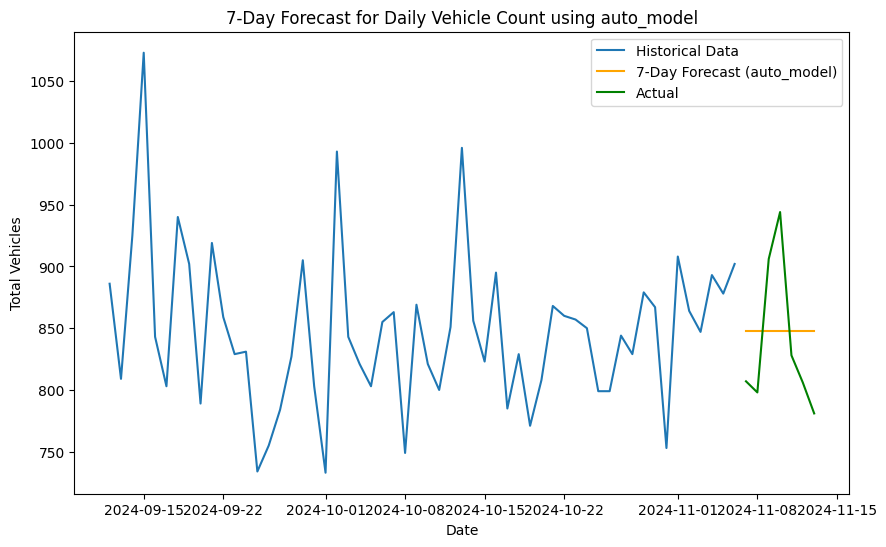

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['camera_1'], label='Historical Data')
plt.plot(test.index, auto_forecast, label='7-Day Forecast (auto_model)', color='orange')
plt.plot(test.index, test['camera_1'], label='Actual', color='green')

plt.xlabel('Date')
plt.ylabel('Total Vehicles')
plt.title('7-Day Forecast for Daily Vehicle Count using auto_model')
plt.legend()
plt.show()

In [63]:
print(test['camera_1'])
print(forecast_df['forecast'])

date
2024-11-07    807
2024-11-08    798
2024-11-09    906
2024-11-10    944
2024-11-11    828
2024-11-12    806
2024-11-13    781
Name: camera_1, dtype: int32
2024-11-07    842.130074
2024-11-08    849.299578
2024-11-09    833.628192
2024-11-10    869.829178
2024-11-11    873.210579
2024-11-12    894.455605
2024-11-13    897.574668
Freq: D, Name: forecast, dtype: float64


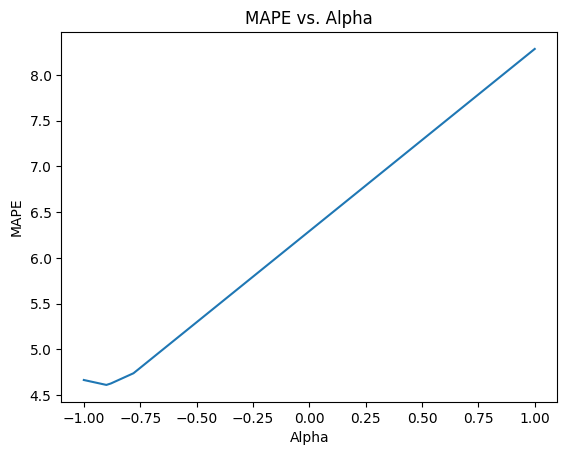

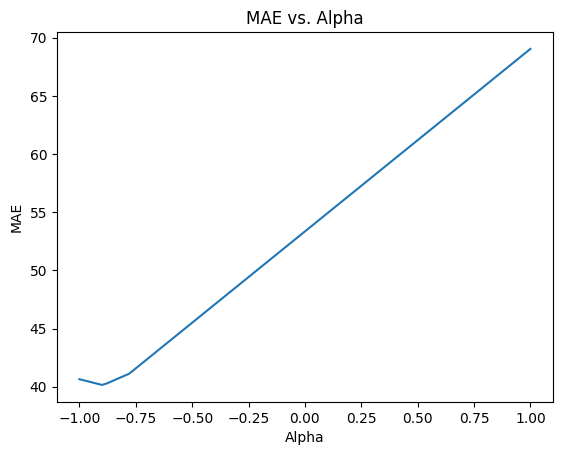

min alpha:  -0.9
MAPE using ensemble model: 4.61%
MAE using ensemble model: 40.15


In [133]:
mape_vs_alpha = []
mae_vs_alpha = []
alphas = []
for alpha in np.linspace(-1, 1, 101):
    ensemble_forecast = alpha * forecast_df['forecast'] + (1 - alpha) * auto_forecast
    mape_ensemble = mean_absolute_percentage_error(test['camera_1'], ensemble_forecast)
    mae_ensemble = mean_absolute_error(test['camera_1'], ensemble_forecast)
    mape_vs_alpha.append(mape_ensemble)
    mae_vs_alpha.append(mae_ensemble)
    alphas.append(alpha)
    # print(f"MAPE using ensemble model: {mape_ensemble:.2f}%")
    # print(f"MAE using ensemble model: {mae_ensemble:.2f}")
plt.plot(alphas, mape_vs_alpha)
plt.xlabel('Alpha')
plt.ylabel('MAPE')
plt.title('MAPE vs. Alpha')
plt.show()
plt.plot(alphas, mae_vs_alpha)
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('MAE vs. Alpha')
plt.show()
print("min alpha: ", alphas[np.argmin(mape_vs_alpha)])
alpha = -0.9
# beta = 0.6
beta = 1-alpha
ensemble_forecast = alpha * forecast_df['forecast'] + beta * auto_forecast
mape_ensemble = mean_absolute_percentage_error(test['camera_1'], ensemble_forecast)
mae_ensemble = mean_absolute_error(test['camera_1'], ensemble_forecast)
print(f"MAPE using ensemble model: {mape_ensemble:.2f}%")
print(f"MAE using ensemble model: {mae_ensemble:.2f}")

In [41]:
car_data = pd.read_csv('car_data.csv')
car_data

,vehicle_no,date,arrival_time,exit_time
0,MHUN7063,2024-09-12,2024-09-12 05:00:00,2024-09-12 08:00:00
1,MHYN4677,2024-09-12,2024-09-12 05:00:00,2024-09-12 08:00:00
2,MHEL6595,2024-09-12,2024-09-12 05:00:00,2024-09-12 08:00:00
3,MHNQ2590,2024-09-12,2024-09-12 05:00:00,2024-09-12 08:20:00
4,MHHA0518,2024-09-12,2024-09-12 05:00:00,NaN
...,...,...,...,...
53671,MHQJ4009,2024-11-13,2024-11-13 20:00:00,2024-11-14 00:00:00
53672,MHPN3450,2024-11-13,2024-11-13 20:00:00,2024-11-14 00:00:00
53673,MHBB9719,2024-11-13,2024-11-13 20:00:00,2024-11-14 00:00:00
53674,MHLE56X9,2024-11-13,NaN,2024-11-13 22:40:00


In [42]:
grouped_car_data = [group for _, group in car_data.groupby('date')]
print(grouped_car_data)

[    vehicle_no        date         arrival_time            exit_time
0     MHUN7063  2024-09-12  2024-09-12 05:00:00  2024-09-12 08:00:00
1     MHYN4677  2024-09-12  2024-09-12 05:00:00  2024-09-12 08:00:00
2     MHEL6595  2024-09-12  2024-09-12 05:00:00  2024-09-12 08:00:00
3     MHNQ2590  2024-09-12  2024-09-12 05:00:00  2024-09-12 08:20:00
4     MHHA0518  2024-09-12  2024-09-12 05:00:00                  NaN
..         ...         ...                  ...                  ...
894   MHOQ0040  2024-09-12  2024-09-12 20:20:00  2024-09-13 00:00:00
895   MHQK9295  2024-09-12  2024-09-12 20:20:00  2024-09-12 23:20:00
896   MHIA1330  2024-09-12  2024-09-12 20:40:00  2024-09-13 00:00:00
897   MHHM2699  2024-09-12                  NaN  2024-09-12 22:00:00
898   MHR91492  2024-09-12                  NaN  2024-09-12 23:00:00

[899 rows x 4 columns],      vehicle_no        date         arrival_time            exit_time
899    MHTR7927  2024-09-13  2024-09-13 05:00:00  2024-09-13 10:40:00
900   

In [43]:
from scipy.spatial.distance import pdist, squareform

# hamming distance
def hamming_distance(s1, s2):
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

# check if hamming distance is 1
def check_hamming_distance(s1, s2):
    return hamming_distance(s1, s2) == 1

# print(res)

In [60]:
combined_car_data = pd.DataFrame(columns=car_data.columns)
print(car_data)
for group in grouped_car_data:
    incomplete_data = group[group['exit_time'].isna() | group['arrival_time'].isna()]
    complete_data = group.dropna(subset=['exit_time', 'arrival_time'])
    # print(complete_data)
    combined_car_data = pd.concat([combined_car_data, complete_data], ignore_index=True)
    for idx, row in incomplete_data.iterrows():
        if row['exit_time'] is np.nan:
            for idx2, row2 in incomplete_data.iterrows():
                if row2['exit_time'] is not np.nan:
                    if check_hamming_distance(row['vehicle_no'], row2['vehicle_no']):
                        row['exit_time'] = row2['exit_time']
                        incomplete_data.drop(idx2, inplace=True)
                        break
    incomplete_data = incomplete_data.dropna(subset=['exit_time','arrival_time'])   
    combined_car_data = pd.concat([combined_car_data, incomplete_data], ignore_index=True)

    # print(incomplete_data)
    # combined_car_data = pd.concat([combined_car_data, incomplete_data], ignore_index=True)

# Remove any remaining rows with NaN in 'arrival_time' or 'exit_time'
combined_car_data.dropna(subset='arrival_time', inplace=True)
combined_car_data.dropna(subset=['exit_time', 'arrival_time'], inplace=True)
combined_car_data.sort_values(by='arrival_time', inplace=True)

      vehicle_no        date         arrival_time            exit_time
0       MHUN7063  2024-09-12  2024-09-12 05:00:00  2024-09-12 08:00:00
1       MHYN4677  2024-09-12  2024-09-12 05:00:00  2024-09-12 08:00:00
2       MHEL6595  2024-09-12  2024-09-12 05:00:00  2024-09-12 08:00:00
3       MHNQ2590  2024-09-12  2024-09-12 05:00:00  2024-09-12 08:20:00
4       MHHA0518  2024-09-12  2024-09-12 05:00:00                  NaN
...          ...         ...                  ...                  ...
53671   MHQJ4009  2024-11-13  2024-11-13 20:00:00  2024-11-14 00:00:00
53672   MHPN3450  2024-11-13  2024-11-13 20:00:00  2024-11-14 00:00:00
53673   MHBB9719  2024-11-13  2024-11-13 20:00:00  2024-11-14 00:00:00
53674   MHLE56X9  2024-11-13                  NaN  2024-11-13 22:40:00
53675   MHDG83S5  2024-11-13                  NaN  2024-11-13 22:40:00

[53676 rows x 4 columns]


C:\Users\mouli\AppData\Local\Temp\ipykernel_209684\3643548316.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_data.drop(idx2, inplace=True)
C:\Users\mouli\AppData\Local\Temp\ipykernel_209684\3643548316.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_data.drop(idx2, inplace=True)
C:\Users\mouli\AppData\Local\Temp\ipykernel_209684\3643548316.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_d

In [96]:
print(combined_car_data.isna().sum())

vehicle_no      0
date            0
arrival_time    0
exit_time       0
duration        0
dtype: int64


In [74]:
# Convert arrival_time and exit_time to datetime if they are not already
combined_car_data['arrival_time'] = pd.to_datetime(combined_car_data['arrival_time'])
combined_car_data['exit_time'] = pd.to_datetime(combined_car_data['exit_time'])

# Calculate the duration
combined_car_data['duration'] = combined_car_data['exit_time'] - combined_car_data['arrival_time']

# Display the updated DataFrame
combined_car_data.sort_values(by='date', inplace=True)
print(combined_car_data)

      vehicle_no        date        arrival_time           exit_time  \
366     MHKW4827  2024-09-12 2024-09-12 11:00:00 2024-09-12 14:40:00   
573     MHTE1445  2024-09-12 2024-09-12 14:20:00 2024-09-12 19:00:00   
579     MHBY8098  2024-09-12 2024-09-12 14:20:00 2024-09-12 19:00:00   
582     MHUQ9987  2024-09-12 2024-09-12 14:20:00 2024-09-12 19:00:00   
585     MHCG8562  2024-09-12 2024-09-12 14:40:00 2024-09-12 19:20:00   
...          ...         ...                 ...                 ...   
51544   MHJD3558  2024-11-13 2024-11-13 05:40:00 2024-11-13 10:00:00   
51524   MHVF8751  2024-11-13 2024-11-13 05:00:00 2024-11-13 09:20:00   
51585   MHJK2000  2024-11-13 2024-11-13 06:20:00 2024-11-13 10:40:00   
52274   MHPN3450  2024-11-13 2024-11-13 20:00:00 2024-11-14 00:00:00   
52137   MHZH8878  2024-11-13 2024-11-13 16:20:00 2024-11-13 21:40:00   

             duration  
366   0 days 03:40:00  
573   0 days 04:40:00  
579   0 days 04:40:00  
582   0 days 04:40:00  
585   0 days 04

In [76]:
grouped_duration_by_date = combined_car_data.groupby('date')['duration'].mean()
print(grouped_duration_by_date)

date
2024-09-12   0 days 04:50:48.054919908
2024-09-13   0 days 06:27:42.578222778
2024-09-14   0 days 08:34:54.062863795
2024-09-15   0 days 08:55:19.699812382
2024-09-16   0 days 08:22:49.175627240
                        ...           
2024-11-09   0 days 05:09:03.772241992
2024-11-10   0 days 04:46:01.414790996
2024-11-11   0 days 04:40:53.071253071
2024-11-12   0 days 04:50:09.113924050
2024-11-13   0 days 05:12:03.116883116
Name: duration, Length: 63, dtype: timedelta64[ns]


In [98]:
train_duration = grouped_duration_by_date[:56]
test_duration = grouped_duration_by_date[56:]

In [99]:
from pmdarima import auto_arima
auto_model_duration = auto_arima(train_duration,
                        # start_p=0, max_p=14,    # Range of values for p
                        # start_q=0, max_q=14,    # Range of values for q
                        p = None,               # Let auto_arima determine the best p
                        q = None,               # Let auto_arima determine the best q
                        d = 0,                # Let auto_arima determine the best d
                        seasonal=True,         # Enable seasonal differencing
                        m=7,                   # Weekly seasonality
                        # start_P=0, max_P=14,    # Range of values for seasonal P
                        # start_Q=0, max_Q=14,    # Range of values for seasonal Q
                        P=None,                # Let auto_arima determine the best P
                        Q=None,                # Let auto_arima determine the best Q

                        D=None,                # Let auto_arima determine the best D
                        trace=True,            # Print results for each model tested
                        # error_action='ignore', # Ignore models that don’t fit
                        suppress_warnings=True,
                        stepwise=True)         # Stepwise search for faster execution

# Display the best model found
print(auto_model_duration.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=3268.512, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3447.090, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3385.918, Time=0.33 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3407.167, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3595.966, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=3265.442, Time=0.50 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=3263.795, Time=0.19 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=3264.760, Time=0.50 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=3345.863, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=3366.077, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[7] intercept   : AIC=3308.925, Time=0.23 sec
 ARIMA(2,0,3)(0,0,0)[7] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=3368.253, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[7] intercept   : AIC=3349.462, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[7] intercept   : 

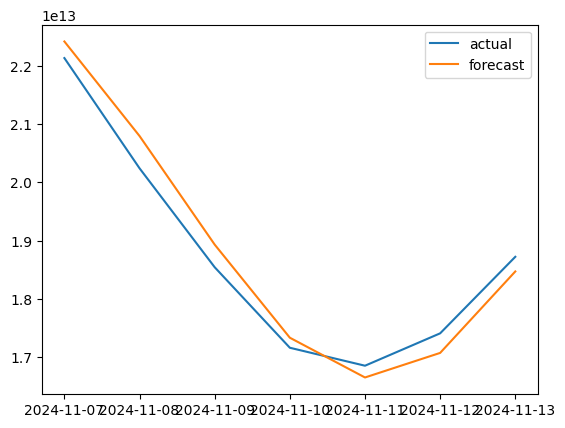

In [100]:
# Forecast the test set
forecast_duration = auto_model_duration.predict(n_periods=len(test_duration))
plt.plot(test_duration.index, test_duration, label='actual')
plt.plot(test_duration.index, forecast_duration, label='forecast')
plt.legend()
plt.show()


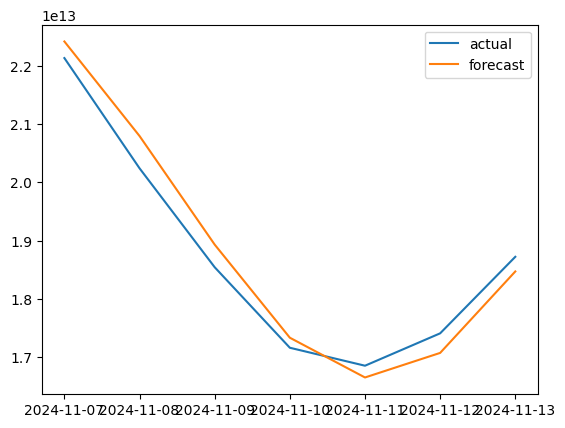

In [101]:
forecast_duration = pd.to_timedelta(forecast_duration)

plt.plot(test_duration.index, test_duration, label='actual')
plt.plot(test_duration.index, forecast_duration, label='forecast')
plt.legend()
plt.show()

In [110]:

forecast_duration = pd.to_timedelta(forecast_duration)
print(forecast_duration)
print(test_duration)


mae_duration = mean_absolute_error(test_duration, forecast_duration)
mape_duration = mean_absolute_percentage_error(test_duration, forecast_duration)
mae_duration = pd.to_timedelta(mae_duration)
print(type(mae_duration))
print(f'Mean Absolute Error: {mae_duration}')
print(f'Mean Absolute Percentage Error: {mape_duration}')


2024-11-07   0 days 06:13:40.258315380
2024-11-08   0 days 05:46:37.030113515
2024-11-09   0 days 05:15:32.478303729
2024-11-10   0 days 04:48:53.778424941
2024-11-11   0 days 04:37:31.103317085
2024-11-12   0 days 04:44:33.038980819
2024-11-13   0 days 05:07:51.606129634
Freq: D, dtype: timedelta64[ns]
date
2024-11-07   0 days 06:08:55.338345864
2024-11-08   0 days 05:37:22.748091603
2024-11-09   0 days 05:09:03.772241992
2024-11-10   0 days 04:46:01.414790996
2024-11-11   0 days 04:40:53.071253071
2024-11-12   0 days 04:50:09.113924050
2024-11-13   0 days 05:12:03.116883116
Name: duration, dtype: timedelta64[ns]
<class 'pandas._libs.tslibs.timedeltas.Timedelta'>
Mean Absolute Error: 0 days 00:05:12.832188544
Mean Absolute Percentage Error: 1.656863531327837
